# Recommendation Engine

## Inicialmente se importan todas las librerías necesarias para este estudio.

In [11]:
# Librerias basicas:
import pandas as pd
import numpy as np
import warnings

## Cargamos el csv: data_analyst.csv

In [13]:
# Cargando el dataset proporcionado para revisar su estructura y contenido
data = pd.read_csv("data_analyst.csv")

# Mostrando las primeras filas del dataset para entender su estructura
data.head()

,Time,V,A,T,current_density,alloy,voltage,ramp_time,holding_time,area,thickness_average_ab,Imax,modeling_thickness,final_thickness
0,2023-03-27 13:25:15,-0.114,0.002,36.7,0.004,7075,20,60,20,0.5,6.295,0.788,0.0,1.344881
1,2023-03-27 13:25:15,-0.114,0.002,36.7,0.004,7075,20,60,20,0.5,6.295,0.788,0.0,1.344881
2,2023-03-27 13:25:15,-0.143,0.003,36.7,0.006,7075,20,60,20,0.5,6.295,0.788,0.0,1.344881
3,2023-03-27 13:25:15,-0.143,0.003,36.7,0.006,7075,20,60,20,0.5,6.295,0.788,0.0,1.344881
4,2023-03-27 13:25:16,-0.294,0.003,36.7,0.006,7075,20,60,20,0.5,6.295,0.788,0.0,1.344881


In [15]:
# Dimensiones del dataframe
dimensions_modified = data.shape

dimensions_modified

(375312, 14)

## Análisis Exploratorio de Datos (EDA)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Preprocesamiento de datos

# Eliminación de posibles duplicados
data_clean = df_prueba

# Selección de columnas relevantes para el modelo
features = ['final_thickness', 'alloy', 'area']
targets = ['voltage', 'ramp_time', 'holding_time']

X = data_clean[features]
y = data_clean[targets]

# Codificación de la variable categórica 'alloy' y escalado de las características numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['final_thickness', 'area']),
        ('cat', OneHotEncoder(), ['alloy'])
    ])

# División del dataset en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selección del modelo
# Usaremos un Random Forest, que es un modelo potente y versátil para regresión
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Evaluación inicial del modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse

0.0

(                   V              A              T  current_density     alloy  \
 count  375312.000000  375312.000000  375312.000000    375312.000000  375312.0   
 mean       12.711791       0.409734      37.912808         0.819467    7075.0   
 std         7.925711       0.282403       0.472186         0.564806       0.0   
 min        -0.460000      -0.004000      35.900000        -0.008000    7075.0   
 25%         2.840750       0.010000      37.600000         0.020000    7075.0   
 50%        14.010000       0.411000      38.000000         0.822000    7075.0   
 75%        20.000000       0.670000      38.200000         1.340000    7075.0   
 max        22.030000       1.770000      39.000000         3.540000    7075.0   
 
              voltage      ramp_time   holding_time      area  \
 count  375312.000000  375312.000000  375312.000000  375312.0   
 mean       17.841321      55.907965      13.393747       0.5   
 std         2.930507      10.296436       7.332383       0.0   


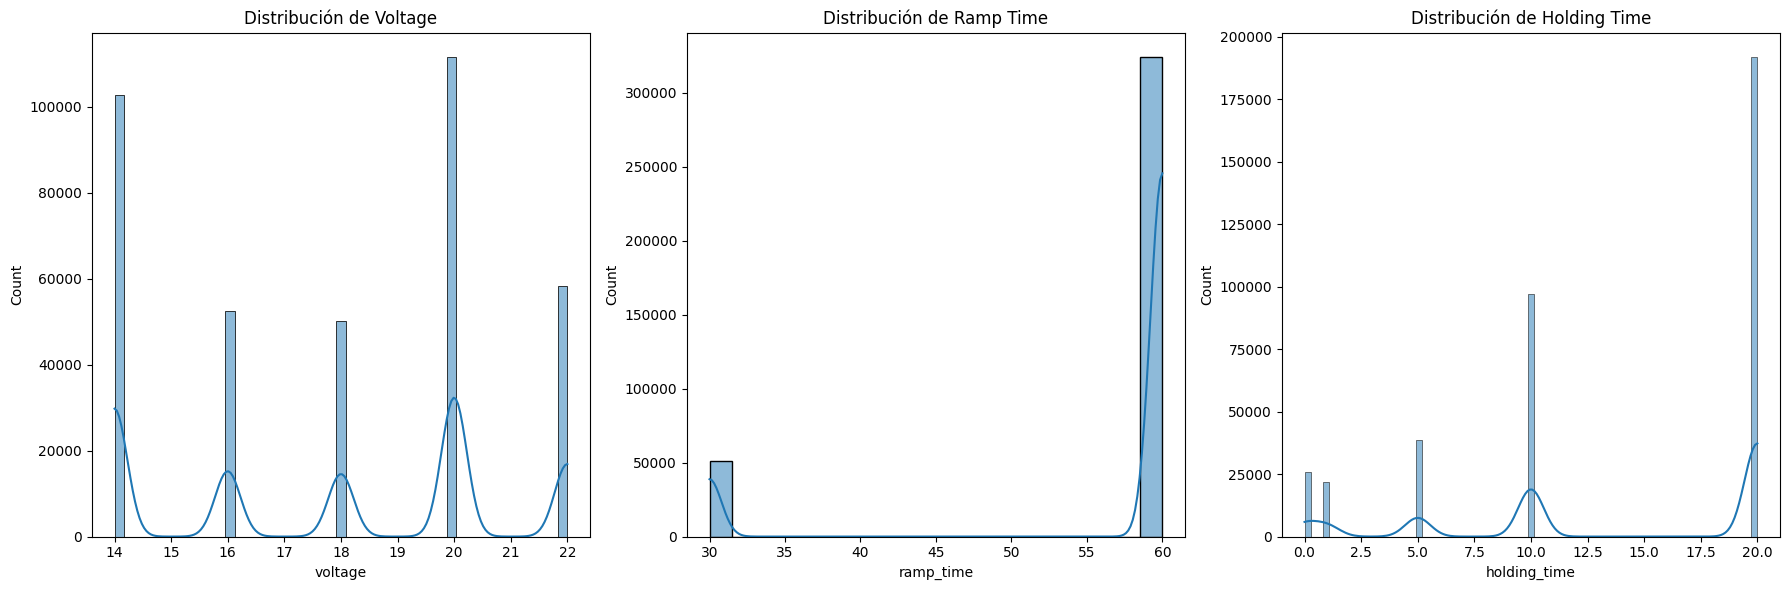

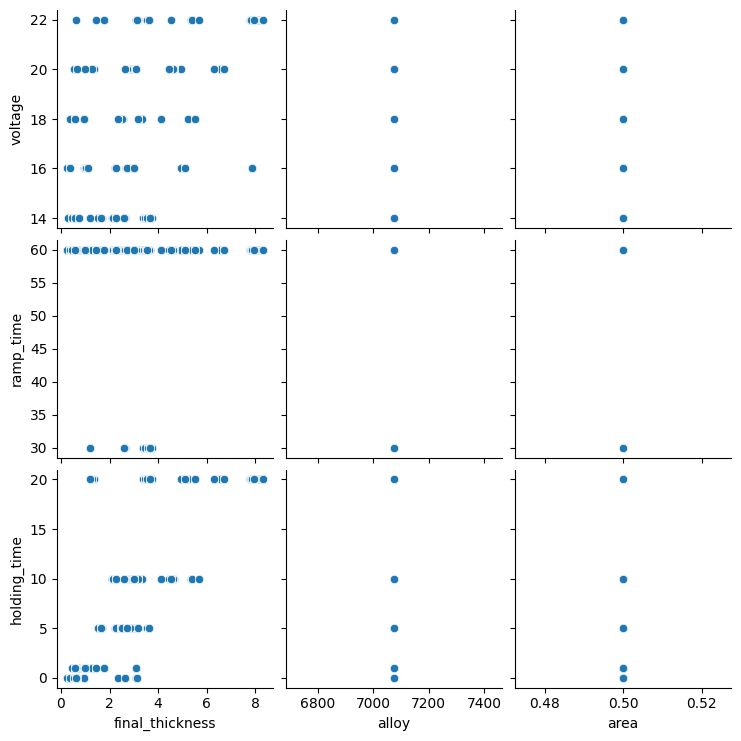

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis Exploratorio de Datos (EDA)
data_clean = df_prueba

# Revisión de estadísticas básicas del dataset
stats = data_clean.describe()

# Revisión de la distribución de las variables objetivo
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.histplot(data_clean['voltage'], ax=axes[0], kde=True)
axes[0].set_title('Distribución de Voltage')

sns.histplot(data_clean['ramp_time'], ax=axes[1], kde=True)
axes[1].set_title('Distribución de Ramp Time')

sns.histplot(data_clean['holding_time'], ax=axes[2], kde=True)
axes[2].set_title('Distribución de Holding Time')

plt.tight_layout()

# Revisión de las relaciones entre las variables de entrada y las de salida
pair_plot = sns.pairplot(data_clean, x_vars=features, y_vars=targets)

stats, pair_plot
